# Lesson I 

## Introduction to Seaborn

* The python visualization landscape is complex and can be overwhelming

<img src='pictures/Landscape.jpg' />

Before we discuss Seaborn in detail, it is helpful to understand where it stands in this landscape. The illustration is from Jake VanderPlas's pycon 2017 presentation on the visualization landscape in Python and highlights the complex ecosystem. The key point is that **Matplotlib** is foundational library used by many visualization tool including **Seaborn**.

## Matplotlib

```matplotlib``` is a robust library that can support building many types of visualizations. **Seaborn** uses it to construct *statistical visualizations*. When working with Seaborn, it is helpful to understand some of the underlying matplotlib constructs.

* ```matplotlib``` provides the raw building blocks for Seaborn's visualizations

* It can also be used on its own to plot data

```python
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("wines.csv")
fig, ax = plt.subplot()
ax.hist(df['alchohol'])
```

<img src='pictures/matplotlib.jpg' />

This specific example includes information about the alcohol content of several different types of wines.

## Pandas

```pandas``` is one of the most important Python libraries for manipulating and analyzing data. In addition to providing powerful data manipulation tools, pandas support basic data plotting functions.

```python
import pandas as pd

df = pd.read_csv('wines.csv')
df['alcohol'].plot.hist()
```

<img src='pictures/pandas.jpg' />

The actual API is consistent with other pandas functions, so it is a very useful tool. The plotting carried out by matplotlib, so the resulting output looks very similar.

## Seaborn

* Seaborn supports complex visualizations of data
* It is built on matplotlib and works best with pandas' dataframes

### Seaborn histplot

A plot similar to the pandas histogram can be created using Seaborn's ```histplot()``` function.

* The histplot is similar to the histogram shown in previous examples
* By default, generates a histogram but can also generate other complex plots.

```python
import seaborn as sns

sns.histplot(df['alcohol'])
```

<img src='pictures/seaborn.jpg'/>

### Seaborn displot

* The displot leverages the histplot and other functions for distrubition plots
* By default, it generates a histogram but can also generate other plot types.

```python
import seaborn as sns

sns.displot(df['alcohol'], kind='kde')
```

<img src='pictures/kde.jpg'/>

## pandas Histogram vs. Displot



| Pandas histogram | Seaborn displot |
| ----------------:|----------------:|
| <img src='pictures/pandas.jpg'/>  | <img src='pictures/seaborn.jpg'/> |
| Actual frequency of observations | Automatic label on x-axis |
| No outline of bars | Muted color palette |
| Wide bins | Cleaner plot |
| No x-axis label |     |


## Exercise I

### Reading a csv File

Before you analyze data, you will need to read the data into a [pandas](https://pandas.pydata.org/) DataFrame. In this exercise, you will be looking at data from US School Improvement Grants in 2010. This program gave nearly $4B to schools to help them renovate or improve their programs.

In [1]:
# import all modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the DataFrame
df = pd.read_csv('datasets/schoolimprovement2010grants.csv')


### Comparing a histogram and displot

The ```pandas``` library supports simple plotting of data, which is very convenient when data is already likely to be in a ```pandas``` DataFrame.

Seaborn generally does more statistical analysis on data and can provide more sophisticated insight 
into the data. In this exercise, we will compare a ```pandas``` histogram vs the ```seaborn``` displot.

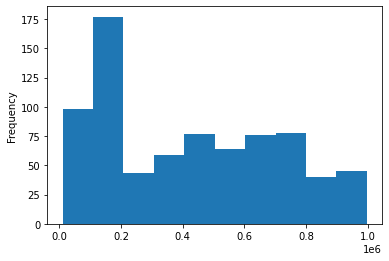

<Figure size 432x288 with 0 Axes>

In [2]:
# Display pandas histogram
df['Award_Amount'].plot.hist()
plt.show()

# Clear out the pandas histogram
plt.clf()

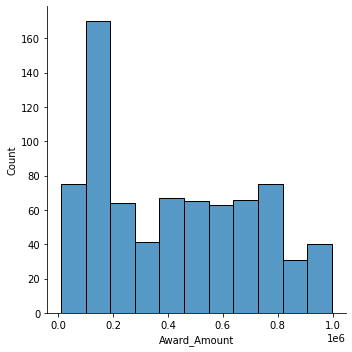

<Figure size 432x288 with 0 Axes>

In [3]:
# Display a Seaborn displot
sns.displot(df['Award_Amount'])
plt.show()

# Clear the displot
plt.clf()

# Lesson II

## Using distribution plot

We will spend some time looking at how to customize distrubition plots in Seaborn. The basic ideas learned with this plot type can be applied to the other Seaborn plotting functions we will see later in this course.

## Creating a Histogram

The Seaborn API supports customizing the type of plot by using different arguments.

* The displot function has multiple arguments
* You can overlay a KDE plot on the histogram and specify the number of bins to use.

```python
sns.displot(df['alcohol'], kde=True, bins=10)
```

<img src='pictures/snskdehist.jpg' />

In this example, we can use the same displot() function to create a standart histogram and overlay a kernel density element (KDE) plot and customize the number of bins to further understand how the values are distributed.

## Alternative Data Distrubitions

* A rug plot is an alternative way to view the distrubition of data by including small tickmarks along the x-axis
* a kde curve and rug plot can be combined

```python
sns.displot(df['alcohol'], kind='kde', rug=True, fill=True)
```

<img src='pictures/snsrugkde.jpg' />

## Further plot types

* The ```displot``` function uses several functions including ```kdeplot```, ```rugplot```, and ```ecdfplot```
* The ```ecdfplot``` shows the cumulative distribution of the data

```python
sns.displot(df['alcohol'], kind='ecdf')
```

<img src='pictures/ecdf.jpg' />


## Exercise II 

### Plot a histogram

The ```displot()``` function will return a histogram by default. The ```displot()``` can also create a **KDE** or **rug** plot which are useful ways to look at the data. Seaborn can also combine these plots so you can perform more meaningful analysis.

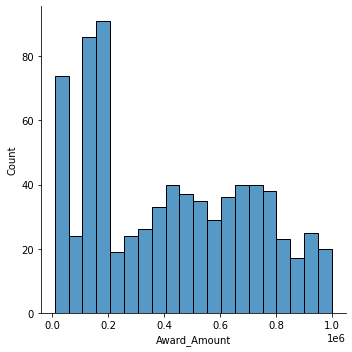

In [4]:
# Create a displot
sns.displot(df['Award_Amount'],
            bins=20)

# Display the plot
plt.show()

### Rug plot and kde Shading

Now that you understand some function arguments for ```displot()```, we can continue further 
refining the output. This process of creating a visualization and updating it in an incremental 
fashion is a useful and common approach to look at data from multiple perspectives.

Seaborn excels at making this process simple.

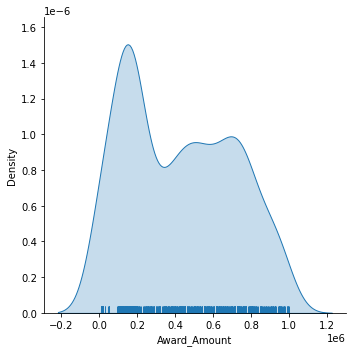

In [5]:
# Create a displot of the Award Amount
sns.displot(df['Award_Amount'],
            kind='kde',
            rug=True,
            fill=True)

# Plot the results
plt.show()

# Lesson III

## Regression Plots in Seaborn

Now that we have taken a loot at distrubition plots in Seaborn, we will transition to another basic visualization process by plotting linear regression lines.

The previous analysis we performed is often referred to as **univariate analysis** because we only look at one variable. **Regression analysis is bivariate** because we are looking for relationships between *two* variables.

### Introduction to regplot

The ```regplot()``` function is the basis for building regression plots in Seaborn. The basic function call is similar to ```displot()```, but we *explicitly* define the *x and y variables as well as the source data*. Since we are using a pandas DataFrame, the x and y variables refer to the columns in the DataFrame.

* The ```regplot``` function generates a scatter plot with a regression line
* Usage is similar to the ```displot```
* the ```data``` and ```x``` and ```y``` variables must be defined

```python
sns.regplot(data=df, x="alcohol", y="pH")
```

<img src='pictures/regplot.jpg' />

In this specific plot, we are interested in any relationship between the alcohol content of the wine and the pH levels. The regression line hints that there might be a slight increase in pH values as the alcohol content increases.

### lmplot() builds on top of the base regplot()

One of the confusing points about Seaborn is that it may seem like there is more than one way to do the same plot. In the previous exercises, we looked at displots and briefly discussed kde and rug plots as building blocks for the more robust displot().

In a similar manner, the lower level regplot() and higher level lmplot() are related. They are called the same way and produce similar output.

| ```regplot```- low level | ```lmplot``` - high level |
| ------------------------ | -------------------------:|
<code> sns.regplot(data=df,x="alcohol",y="quality")</code> | <code> sns.lmplot(data=df, x='alcohol', y="quality")</code> |
| <img src='pictures/regplotlowlevel.jpg' /> | <img src='pictures/lmplothighlevel.jpg' /> |
        
In this example, we can look at the relationship between alcohol content and quality using both of these plot types. The output look similar excep for the aspect ratio. However the lmplot() is much more powerful and much more flexible.

### lmplot Faceting

The use of **hue** and **columns** is a powerful concept that is present throughout many of Seaborn's functions. The use of plotting multiple graphs while changing a single variable is often called **faceting**.

| Organize data by colors (```hue```) | Organize data by columns (```col```) |
| -----------------------------------:|-------------------------------------:|
| <code> sns.lmplot(data=df, x="quality", y="alcohol", hue="type") </code> | <code> sns.lmplot(data=df, x="quality", y="alcohol", col="type") </code> |
| <img src='pictures/huetype.jpg' /> | <img src='pictures/coltype.jpg' /> |

In this case faceting can be accomplished by using the ```lmplot()``` function. The base function is very similar to ```regplot()``` but it provides much more power by allowing you to add additional information using **columns, colors, or rows**.

There are entire class of functions in Seaborn that support this type of faceting and we will continue to explore them.

## Exercise III

### Create a regression plot

For this set of exercises, we will be looking at **FiveThirtyEight**'s data on which US State has 
the worst drivers. The data set includes summary level information about fatal accidents as well as 
insurance premiums for each state as of 2010.

In this exercise, we will look at the difference between the regression plotting functions.

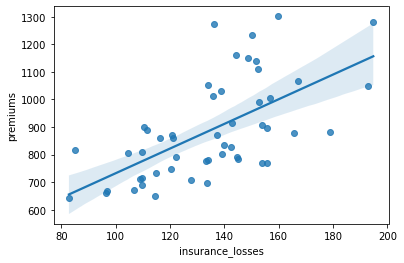

In [6]:
# Insurunce premium dataset
df = pd.read_csv("datasets/insurance_premiums.csv")

# Create a regression plot of premiums vs. insurance_losses
sns.regplot(data=df,
            x="insurance_losses",
            y="premiums")

# Display the plot
plt.show()

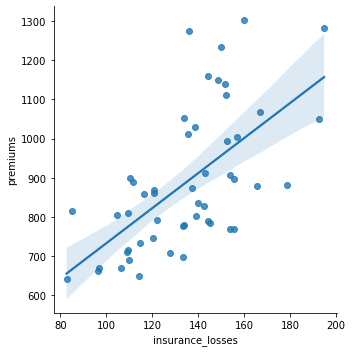

In [7]:
# Create an lmplot of premiums vs. insurance_losses
sns.lmplot(data=df,
           x="insurance_losses",
           y="premiums")

# Display the second plot
plt.show()

### Plotting multiple variables

Since we are using ```lmplot()``` now, we can look at the more complex interactions of data. This 
data set includes geographic information by state and area. It might be interesting to see if there 
is a difference in relationships based on the ```Region``` of the country.

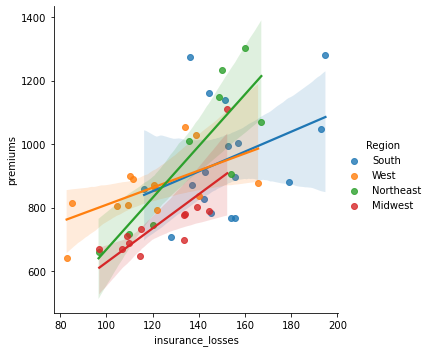

In [8]:
# Create a regression plot using hue
sns.lmplot(data=df,
           x="insurance_losses",
           y="premiums",
           hue="Region")

# Show the results
plt.show()

### Faceting multiple regressions

```lmplot()``` allows us to facet the data across multiple rows and columns. In the previous plot, 
the multiple lines were difficult to read in one plot. We can try creating multiple plots by ```Region``` to see if that is a more useful visualization.

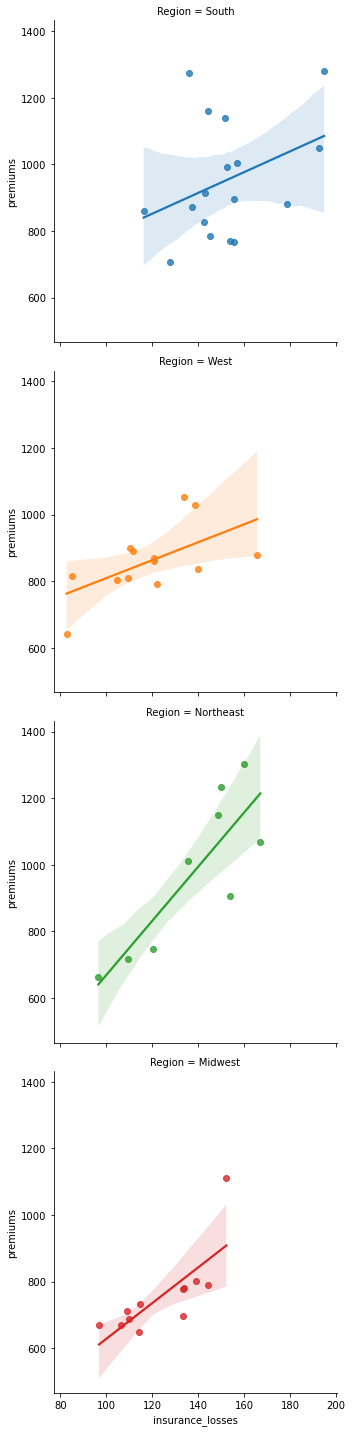

In [11]:
# Create a regression plot with multiple rows
sns.lmplot(data=df,
           x="insurance_losses",
           y="premiums",
           row="Region",
           hue="Region")

# Show the plot
plt.show()